In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("C:/Users/SURENDHAN/Downloads/cognifyz dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [49]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [50]:
df.shape

(9551, 21)

In [51]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [52]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [53]:
df=df.dropna(subset=['Cuisines'])

In [54]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [55]:
df['Restaurant ID'].duplicated().sum()

0

this indicates that restaurant id is unique and there is no duplicates


In [56]:
df[df['Restaurant Name'].duplicated()]['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day          82
Domino's Pizza           78
Subway                   62
Green Chick Chop         50
McDonald's               47
                         ..
Delhi Chaat Bhandar       1
34 Parkstreet Lane        1
Syall Kotian Da Dhaba     1
Kati Roll Cottage         1
D�_vero��lu               1
Name: count, Length: 734, dtype: int64

how ever the restaurant id is unique many restaurant having same name

In [57]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [58]:
df['Last Part'] = df['Locality Verbose'].str.split(',').str[-1].str.strip()
o = (df['Last Part'] == df['City']).sum()
print(o)
print(df.shape[0])

9538
9542


from the above we can observe that locality verbose combines locality and city . so we can drop it

In [59]:
df=df.drop(columns=['Locality Verbose','Last Part'],axis=0)

In [60]:
len(df['Currency'].unique())

12

In [61]:
len(df['Country Code'].unique())

15

In [62]:
t=df.groupby('Country Code')['Currency'].value_counts().reset_index()
t[t['Currency'].duplicated()]

,Country Code,Currency,count
3,37,Dollar($),4
8,184,Dollar($),20
14,216,Dollar($),425


from the above dollar is used in three country as currency

In [63]:
y=df.loc[0,['Locality','Address']]
y['Address']

'Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City'

In [64]:
y

Locality            Century City Mall, Poblacion, Makati City
Address     Third Floor, Century City Mall, Kalayaan Avenu...
Name: 0, dtype: object

from the above we can said that locality is the half part of the address

TASK 1 - TO FIND THE TOP CUISINES WITH THE PERCENTAGE OF RESTAURANTS SERVE IT 

In [65]:
t=df['Cuisines'].value_counts().head(10)
t=t.reset_index(name='new')

Text(0.5, 0, 'TOTAL SERVED VALUE')

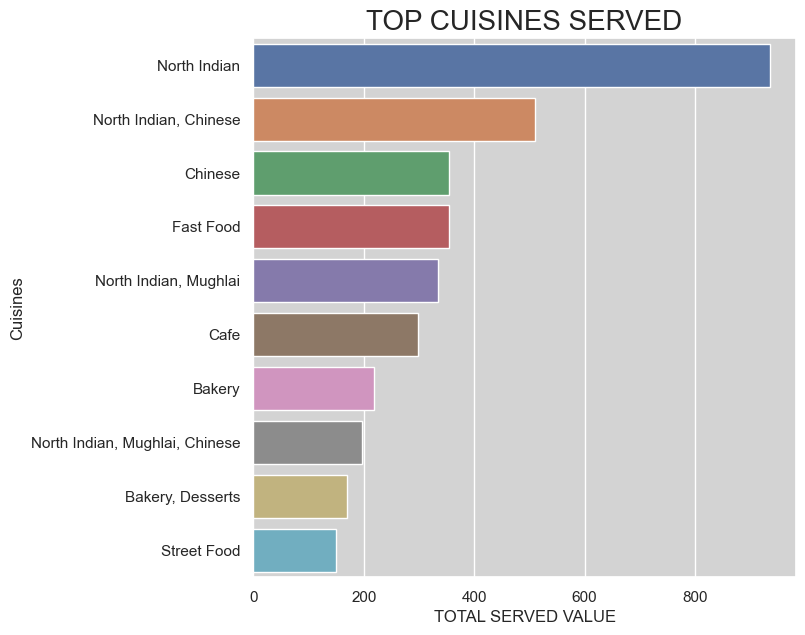

In [66]:
sns.set(style='darkgrid',rc={'figure.figsize':(7,7),'axes.titlesize':20,'axes.facecolor':'lightgrey'})
sns.barplot(data=t,y='Cuisines',x='new',hue='Cuisines')
plt.title('TOP CUISINES SERVED')
plt.xlabel('TOTAL SERVED VALUE')


In [67]:
t

,Cuisines,new
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [68]:
t['res per']=(t['new']/len(df['Restaurant ID']))*100
t

,Cuisines,new,res per
0,North Indian,936,9.809264
1,"North Indian, Chinese",511,5.355271
2,Chinese,354,3.709914
3,Fast Food,354,3.709914
4,"North Indian, Mughlai",334,3.500314
5,Cafe,299,3.133515
6,Bakery,218,2.284636
7,"North Indian, Mughlai, Chinese",197,2.064557
8,"Bakery, Desserts",170,1.781597
9,Street Food,149,1.561518


Text(0.5, 1.0, 'PERCENTAGE OF RESTAURANT SERVING TOP FOODS')

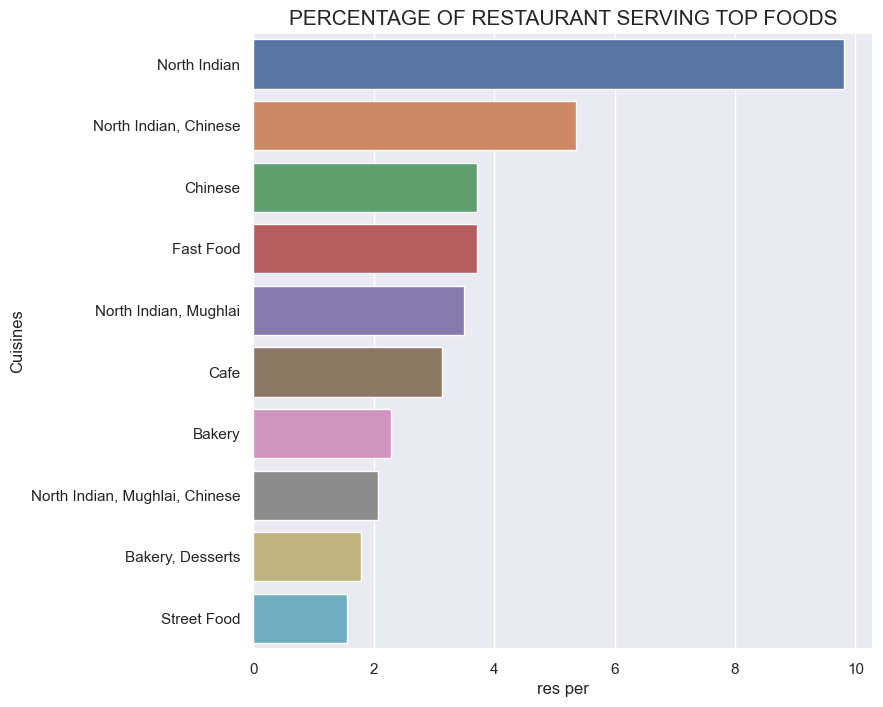

In [69]:
sns.set(rc={'figure.figsize':(8,8),'axes.titlesize':15})
sns.barplot(data=t,x='res per',y='Cuisines',hue='Cuisines')
plt.title('PERCENTAGE OF RESTAURANT SERVING TOP FOODS')

TASK 2 - CITY ANALYSIS

In [70]:
ct=df['City'].value_counts().head(10).reset_index(name='value')
ct

,City,value
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Ahmedabad,21
6,Guwahati,21
7,Amritsar,21
8,Bhubaneshwar,21
9,Lucknow,21


I AM TAKING TOP 5 CITIES ONLY FOR BETTER VISUALIZATION 

In [71]:
ct=ct.head(5)

Text(0.5, 0, 'NUMBER OF RESTAURANT')

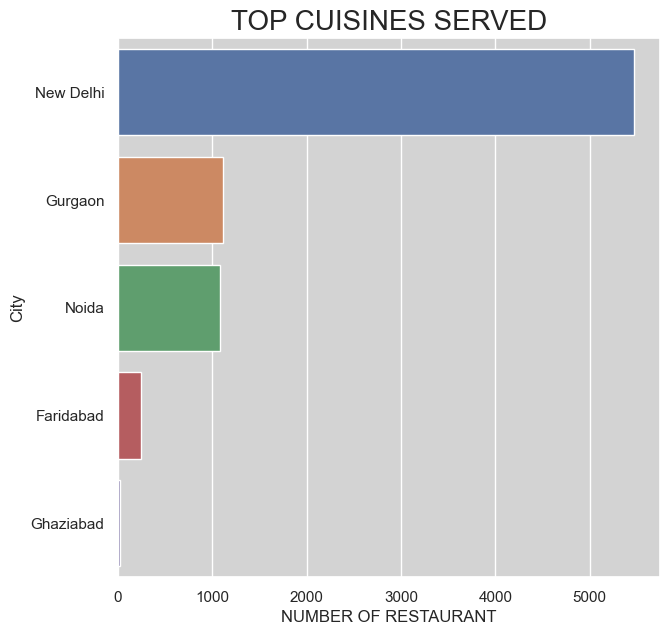

In [72]:
sns.set(style='darkgrid',rc={'figure.figsize':(7,7),'axes.titlesize':20,'axes.facecolor':'lightgrey'})
sns.barplot(data=ct,y='City',x='value',hue='City')
plt.title('TOP CUISINES SERVED')
plt.xlabel('NUMBER OF RESTAURANT')

therefore NEW DELHI IS THE CITY WITH MORE RESTAURANTS

In [73]:
(df['Aggregate rating']>=5).sum()

0

In [74]:
len(df['City'].unique())

140

In [75]:
uo={}
for i in df['City'].unique():
    uo[i]=((df[df['City']==i]['Aggregate rating'].sum())/(df[df['City']==i]['City'].count()))
uo

{'Makati City': 4.65,
 'Mandaluyong City': 4.625,
 'Pasay City': 4.366666666666666,
 'Pasig City': 4.633333333333333,
 'Quezon City': 4.8,
 'San Juan City': 4.25,
 'Santa Rosa': 3.8,
 'Tagaytay City': 4.5,
 'Taguig City': 4.525,
 'Bras�_lia': 3.495,
 'Rio de Janeiro': 4.265,
 'S��o Paulo': 3.53,
 'Albany': 3.552941176470588,
 'Armidale': 3.5,
 'Athens': 4.200000000000001,
 'Augusta': 4.13,
 'Balingup': 3.2,
 'Beechworth': 4.6,
 'Boise': 4.26,
 'Cedar Rapids/Iowa City': 4.165,
 'Chatham-Kent': 3.7,
 'Clatskanie': 4.3,
 'Cochrane': 3.1,
 'Columbus': 4.03,
 'Consort': 3.0,
 'Dalton': 4.109999999999999,
 'Davenport': 3.7150000000000007,
 'Des Moines': 4.235,
 'Dicky Beach': 3.6,
 'Dubuque': 3.535,
 'East Ballina': 4.1,
 'Fernley': 3.7,
 'Flaxton': 3.5,
 'Forrest': 3.7,
 'Gainesville': 4.042105263157895,
 'Hepburn Springs': 3.8,
 'Huskisson': 4.1,
 'Inverloch': 3.7,
 'Lakes Entrance': 3.8,
 'Lakeview': 3.6,
 'Lincoln': 4.5,
 'Lorn': 3.6,
 'Macedon': 3.5,
 'Macon': 4.131578947368421,
 'Mayfi

In [76]:
df[df['City']=='Tagaytay City']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
17,6318213,Balay Dako,162,Tagaytay City,"Aguinaldo Highway, Tagaytay City",Tagaytay City,120.951589,14.101834,Filipino,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,211


In [77]:
df['average rating']=df['City'].map(uo)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,average rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,4.650
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,4.650
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,4.625
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,4.625
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,4.625


In [78]:
yy=df.sort_values(by='average rating',ascending=False)
tc=yy['City'].unique()[0:5]
tc


array(['Inner City', 'Quezon City', 'Makati City', 'Pasig City',
       'Mandaluyong City'], dtype=object)

'Inner City', 'Quezon City', 'Makati City', 'Pasig City','Mandaluyong City' . THESE ARE THE TOP CITIES 

TASK 3 - PRICE RANGE ANALYSIS

In [79]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [80]:
uq=df['Price range'].value_counts()
uq

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

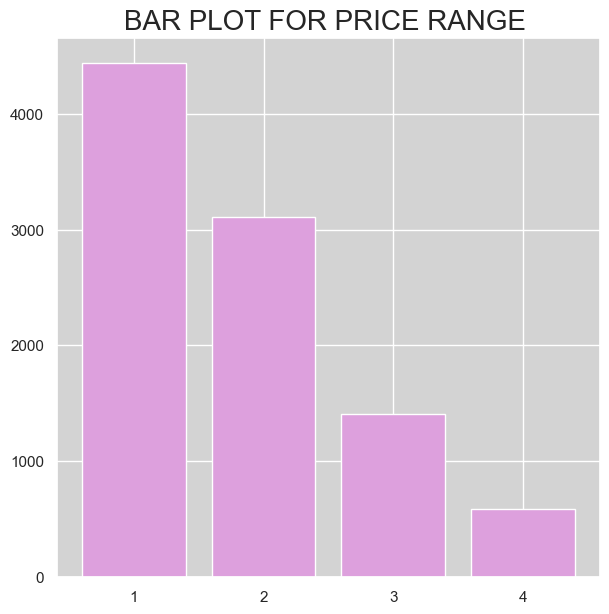

In [81]:
plt.bar(uq.index,uq.values,color='plum')
plt.xticks([1,2,3,4])
plt.minorticks_on()
plt.title('BAR PLOT FOR PRICE RANGE ')
plt.show()

In [82]:
pr={}
for i in df['Price range'].unique():
    pr[i]=((df[df['Price range']==i]['Restaurant ID'].count())/len(df['Restaurant ID']))*100
pr

{3: 14.724376440997695,
 4: 6.141270173967722,
 2: 32.62418780129952,
 1: 46.510165583735066}

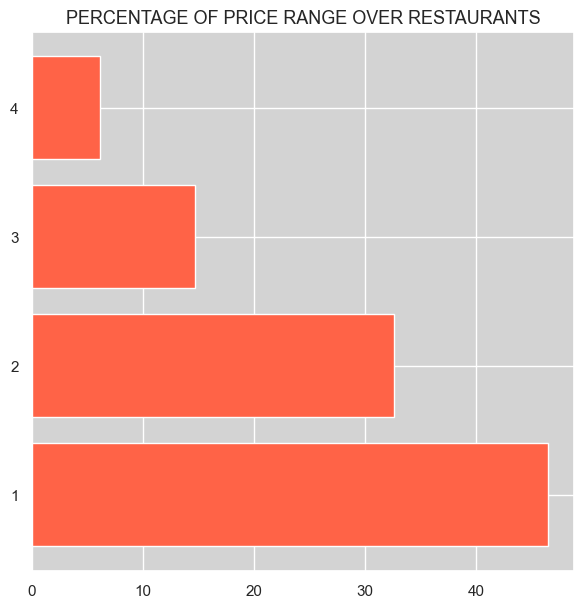

In [83]:
plt.barh(pr.keys(),pr.values(),color='Tomato')
plt.yticks([1,2,3,4])
plt.minorticks_on()
plt.title('PERCENTAGE OF PRICE RANGE OVER RESTAURANTS',fontsize=13)
plt.show()

TASK 4 - ONLINE DELIVERY

In [84]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'average rating'],
      dtype='object')

In [85]:
df['Has Online delivery']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9542, dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
df['Has Online delivery']=ll.fit_transform(df['Has Online delivery'])
av=df['Has Online delivery'].sum()
av

2451

about 2451 restaurant has online delivery

In [91]:
per=(av/(len(df['Restaurant ID'])))*100
per

25.686438901697755

ABOUT 25 PERCENTAGE OF HOTEL HAS ONLINE DELIVERY

In [116]:
nd=df[df['Has Online delivery']==0]['Aggregate rating'].count()
od=df[df['Has Online delivery']==1]['Aggregate rating'].count()
nd,od

(7091, 2451)

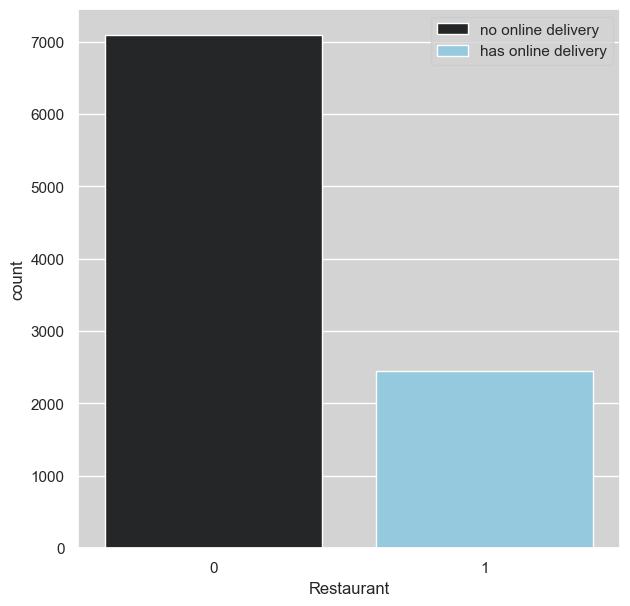

In [114]:
sns.countplot(data=df,x='Has Online delivery',color='skyblue',hue='Has Online delivery',palette='dark:skyblue')
plt.xlabel('Restaurant')
plt.legend(labels=['no online delivery','has online delivery'])
plt.show()

In [115]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'average rating'],
      dtype='object')

In [124]:
ndd=(nd/len(df['Restaurant ID']))*100
odd=(od/len(df['Restaurant ID']))*100
print('THE PERCENTAGE OF HOTELS WITHOUT ONLINE DELIVERY IS ',ndd)
print('THE PERCENTAGE OF HOTELS WITH ONLINE DELIVERY IS ',odd)

THE PERCENTAGE OF HOTELS WITHOUT ONLINE DELIVERY IS  74.31356109830224
THE PERCENTAGE OF HOTELS WITH ONLINE DELIVERY IS  25.686438901697755


THUS WE HAVE FINDED THE PERCENTAGE OF HOTELS WITH ONLINE DELIVERY